In [1]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from Utils.preprocessing import EcgDataset, ToTensor


transform = transforms.Compose([
    ToTensor(),
    transforms.Resize([64, 64])
    # transforms.Normalize(mean=[0.5], std=[0.5])
])

dataset = EcgDataset(
    root_dir="Data/training_data/dataset",
    transform=transform
)

train_data, val_data = random_split(dataset, [0.8,0.2])

train_loader = DataLoader(
    train_data,
    batch_size=64,
    shuffle=True
)
val_loader = DataLoader(
    val_data,
    batch_size=64,
    shuffle=True
)

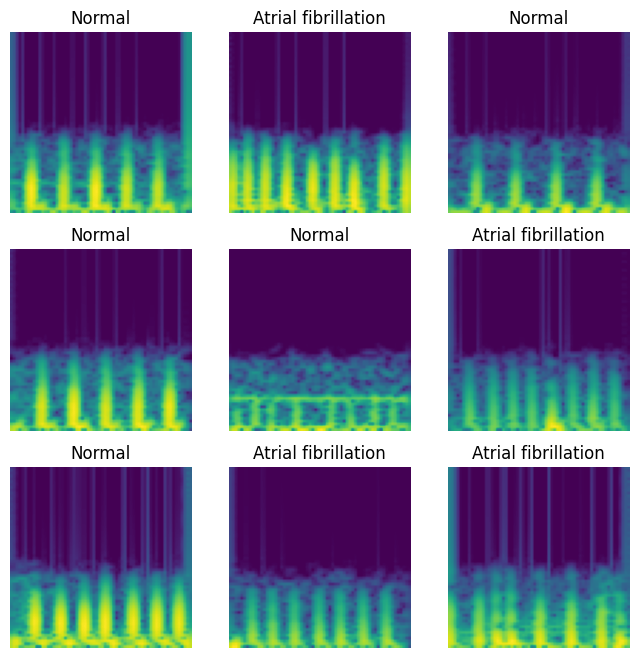

In [2]:
labels_map = {
    0: "Normal",
    1: "Atrial fibrillation"
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    # print(sample_idx)
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="viridis")
plt.show()

In [3]:
from torchsummary import summary
from Network.afib_detector_v2_0 import AfibDetector

net = AfibDetector()

if torch.cuda.is_available():
    net.cuda()

summary(net, (1,64,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 62, 54]           1,088
              ReLU-2           [-1, 32, 62, 54]               0
         MaxPool2d-3           [-1, 32, 31, 18]               0
            Conv2d-4            [-1, 32, 30, 8]          22,560
         MaxPool2d-5            [-1, 32, 15, 2]               0
            Linear-6                  [-1, 100]          96,100
              ReLU-7                  [-1, 100]               0
           Dropout-8                  [-1, 100]               0
            Linear-9                    [-1, 2]             202
          Softmax-10                    [-1, 2]               0
Total params: 119,950
Trainable params: 119,950
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 1.84
Params size (MB): 0.46
Estimated T

In [4]:
import torch.nn as nn
from torch import optim
from Utils.model_trainer import ModelTrainer
import os

MODEL_PATH = "./Models/afib_detector_v2_0_1/afib_detector_v2_0_1"
if not os.path.exists(os.path.dirname(MODEL_PATH)):
        os.makedirs(os.path.dirname(MODEL_PATH))

learning_rate = 0.005

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

#TODO
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.003)

epochs = 10
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print("Device:", device)

net.to(device)

modelTrainer = ModelTrainer(MODEL_PATH)

modelTrainer.train_model(
    net,
    train_loader,
    val_loader,
    loss_fn,
    optimizer,
    device,
    epochs
)

#TODO
# ModelTrainer.save_checkpoint(net.epoch, net, optimizer, "./Models/afib_detector_v0_1_checkpoint.pt")

# checkpoint = torch.load(CHECKPOINT_PATH)
# net.load_state_dict(checkpoint['model_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# start_epoch = checkpoint['epoch']
# print(f"Resuming training from epoch {start_epoch}")

Device: cuda:0
EPOCH 1:
	batch 336 loss: 0.6837029490797293
	batch 672 loss: 0.5852675092007432
	batch 1008 loss: 0.5502684366490159
	batch 1344 loss: 0.53705214114771
	batch 1680 loss: 0.517499662758339
LOSS train 0.517499662758339 valid 0.5638539868975478 ACCURACY 0.738372266292572
EPOCH 2:
	batch 336 loss: 0.5023470508555571
	batch 672 loss: 0.4913690591319686
	batch 1008 loss: 0.48532725196509136
	batch 1344 loss: 0.4806614300856988
	batch 1680 loss: 0.4754359934124209
LOSS train 0.4754359934124209 valid 0.47362635077603354 ACCURACY 0.8408000469207764
EPOCH 3:
	batch 336 loss: 0.47637034251931165
	batch 672 loss: 0.4681692621892407
	batch 1008 loss: 0.4696856513619423
	batch 1344 loss: 0.4670794178687391
	batch 1680 loss: 0.4688542362834726
LOSS train 0.4688542362834726 valid 0.5360247717192507 ACCURACY 0.7642115950584412
EPOCH 4:
	batch 336 loss: 0.45980053465990794
	batch 672 loss: 0.4589254901345287
	batch 1008 loss: 0.4504931467984404
	batch 1344 loss: 0.41822659729846884
	batc